What are the most demanded skills for the top 3 most popular data role?

methodology:

1.clean-up skill column
2.calculate skill count based on job_title_short
(for that particular job how many times is  that skill appearing)
3.calculate skill percentage
4.plot final findings

In [17]:
#import all the necessary libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#load the data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
#well also cleanup the skills col and convert string to list type
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [18]:
#now we need all the job_titles but only specific to the united states
df_US=df[df['job_country']=='United States']

In [19]:
#now we use the explode method on the job_skills col and convert it to individual rows
df_skills=df_US.explode('job_skills')
df_skills[['job_skills','job_title']]

,job_skills,job_title
0,None,Senior Clinical Data Engineer / Principal Clin...
3,python,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...
3,c++,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...
3,java,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...
3,matlab,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...
...,...,...
785692,r,Data Scientist- Hybrid Work Location
785703,None,Data Analyst - CRYPTOGRAPHY - Full-time
785705,sql,Expert Business Data Analyst - Now Hiring
785705,python,Expert Business Data Analyst - Now Hiring


In [20]:
#now im going to group the same job title and skills pair together
#since we exploded our skills into rows we can easily groupby
#eg all data analyst + sql will be grouped together all those have data scientist and ml will be grouped together
#groupby-> the things which are exactly the same are grouped together  (combine the exact skills and job title together)
#exact same combination ko saath mein group karo
#same jobskill and jobtitle are grouped together
#size() counts how many same pairs came

df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()

#but groupby converts this to series we need to convert this back to df 
#we will use the rest_index method and since the count col does not have proper header we will give it a proper header
df_skills_count=df_skills_count.reset_index(name='skill_count')

#lets sort the count values in descending order
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [21]:
#now we need all the unique job_titles 
#so we will use the unique method so we get all the job titles but not repeating twice
#it will give an array therefore we will convert it to list using tolist() method
job_titles=df_skills_count['job_title_short'].unique().tolist()

#we need only the first three values and in a sorted way
job_titles=sorted(job_titles[:3])
job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

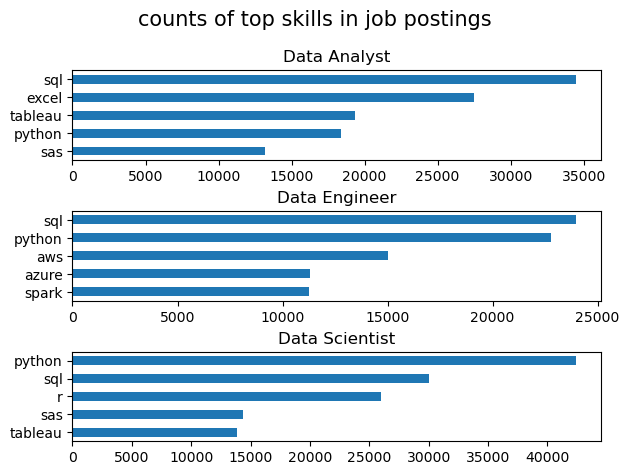

In [22]:
#now we will plot the graph
#row=no of job_titles and col=1
fig, ax = plt.subplots(len(job_titles),1)

#now we iterate through each job_titles
#use a for loop to iterate through the job_titles list
#enumerate=> first gives index and then the value
#i is index and job_title is the iterator 
for i,job_title in enumerate(job_titles):
    #create a new df which only contains the job_titles in the job_titles list
    #we access the job_titles col from the df and check if its equal to job_title in the list and if its equal then put in the df
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    #now plot it
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
fig.suptitle('counts of top skills in job postings',fontsize=15)
fig.tight_layout(h_pad=0.5)#fix the overlap
plt.show()
    

In [23]:
''' 
Imagine you have a big table (your df_skills) that lists jobs and the skills needed for them. It might look something like this:

job_title_short	job_skills
Data Analyst	SQL
Data Analyst	Python
Data Scientist	Python
Data Analyst	SQL
Data Scientist	Machine Learning
The code you provided is doing this:

groupby(['job_skills','job_title_short']): This means "group the rows together" that have the exact same combination of skill and job title.

So, it would create groups like:

Group 1: (SQL, Data Analyst)

Group 2: (Python, Data Analyst)

Group 3: (Python, Data Scientist)

Group 4: (Machine Learning, Data Scientist)

.size(): This simply means "count how many rows are in each of those groups."

So, the final result (df_skills_count) is a count of how many times each skill is mentioned for each job title.
'''

' \nImagine you have a big table (your df_skills) that lists jobs and the skills needed for them. It might look something like this:\n\njob_title_short\tjob_skills\nData Analyst\tSQL\nData Analyst\tPython\nData Scientist\tPython\nData Analyst\tSQL\nData Scientist\tMachine Learning\nThe code you provided is doing this:\n\ngroupby([\'job_skills\',\'job_title_short\']): This means "group the rows together" that have the exact same combination of skill and job title.\n\nSo, it would create groups like:\n\nGroup 1: (SQL, Data Analyst)\n\nGroup 2: (Python, Data Analyst)\n\nGroup 3: (Python, Data Scientist)\n\nGroup 4: (Machine Learning, Data Scientist)\n\n.size(): This simply means "count how many rows are in each of those groups."\n\nSo, the final result (df_skills_count) is a count of how many times each skill is mentioned for each job title.\n'

In [24]:
#first we imported all the necessary libraries

#then we need all the job_titles but specifically in the us

#then we exploded the job_skills col to get each skill into individual rows

#then once we exploded each skills we grouped together skills and job_title

#exact skills and job title are gouped together and we applied the size() method to get the counts

#now groupby converts df into series and the count col is not named properly

#to convert back into df use reset_index and give a proper header to the count col

#now we need to sort the counts in descending order

#then ill apply the unique method on the job_title_short col of df_skills_count and get the titles

#then store it in the job_titles list by converting it by tolist() method

#then I need only the first 3 in sorted form

#now ill plot the graph

In [25]:
#now well apply the value counts method on the job_title_short col to count the no of times each job has come
#since it gets converted to a series we will convert it back to df with the help of reset index and name the values_count col by jobs_total
df_job_title_count=df_US['job_title_short'].value_counts().reset_index(name='jobs_total')



In [ ]:
#now we will merge it with the df_skills_count and the col which is common in both is the job_title_short and we did left join
df_skills_perc=pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')


,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [27]:
''' 
The Simple Explanation
This line is like combining two separate lists of information about the same job titles.

Think of it as taking two Excel spreadsheets and matching them up based on the job title.

Real-Life Example
Let's say you have two tables:

Table 1: Skills Count

Job Title	Skills Count
Data Scientist	150 skills
Data Analyst	120 skills
Table 2: Job Count

Job Title	Job Openings
Data Scientist	50 jobs
Data Analyst	30 jobs
When you merge them on='job_title_short', you get:

Combined Table:

Job Title	Skills Count	Job Openings
Data Scientist	150 skills	50 jobs
Data Analyst	120 skills	30 jobs
Breaking Down the Parameters
df_skills_count: Your first table (shows how many skills each job title has)

df_job_title_count: Your second table (shows how many job openings each title has)

on='job_title_short': The common column that both tables share (like "Data Scientist")

how='left': This is the merging rule - it means:

"Keep ALL the job titles from the first table (left table)"

"Only bring in matching information from the second table"

What how='left' Means Visually
If df_skills_count has:

Data Scientist

Data Analyst

Machine Learning Engineer

But df_job_title_count only has:

Data Scientist

Data Analyst

The result will include ALL THREE job titles from the first table, even if there's no match in the second table (Machine Learning Engineer might show NaN or blank for job openings).

Why You'd Do This
You're combining information to get a complete picture:

"For each job title, how many skills are mentioned AND how many job openings exist?"
'''

' \nThe Simple Explanation\nThis line is like combining two separate lists of information about the same job titles.\n\nThink of it as taking two Excel spreadsheets and matching them up based on the job title.\n\nReal-Life Example\nLet\'s say you have two tables:\n\nTable 1: Skills Count\n\nJob Title\tSkills Count\nData Scientist\t150 skills\nData Analyst\t120 skills\nTable 2: Job Count\n\nJob Title\tJob Openings\nData Scientist\t50 jobs\nData Analyst\t30 jobs\nWhen you merge them on=\'job_title_short\', you get:\n\nCombined Table:\n\nJob Title\tSkills Count\tJob Openings\nData Scientist\t150 skills\t50 jobs\nData Analyst\t120 skills\t30 jobs\nBreaking Down the Parameters\ndf_skills_count: Your first table (shows how many skills each job title has)\n\ndf_job_title_count: Your second table (shows how many job openings each title has)\n\non=\'job_title_short\': The common column that both tables share (like "Data Scientist")\n\nhow=\'left\': This is the merging rule - it means:\n\n"Keep 

In [31]:
#now we are going to calculate the skills percentage
#so in ur new df define a new col called skill_percent 
#u will access the skill_count col and the jobs_total col and divide it
df_skills_perc['skill_percent']=100*df_skills_perc['skill_count']/df_skills_perc['jobs_total']
df_skills_perc


,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


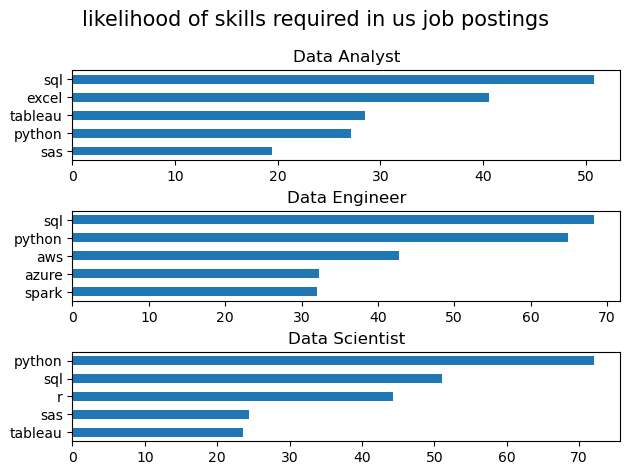

In [34]:
#now well plot this then we can see the percentage
fig, ax= plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_percent',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
fig.suptitle('likelihood of skills required in us job postings', fontsize=15)
fig.tight_layout(h_pad=0.5)#fix the overlap
plt.show()